In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sympy as sp
from sklearn.linear_model import LinearRegression
plt.style.use("ggplot")

1.

In [ ]:
df = pd.DataFrame()
df["X_1"] = np.arange(0,6,1)
df["Y"] = np.arange(0,6,1)
df["Entrenaminento"] = [0,1,2,3,4,"m"]
df = df.set_index("Entrenaminento")
df

,X_1,Y
Entrenaminento,,
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
m,5,5


2.

In [ ]:
def h(theta_0,theta_1,X):
    return theta_0 + theta_1*X

def Coste(theta_0,theta_1,X,Y):
  m = len(X)
  return np.sum((h(theta_0,theta_1,X)-Y)**2)/(2*m)

3.

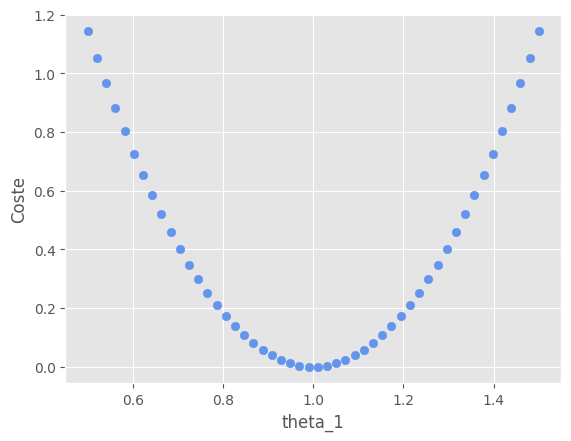

In [ ]:
theta_1_test = np.linspace(0.5,1.5,50)
for i in range(len(theta_1_test)):
  plt.scatter(theta_1_test[i],Coste(0,theta_1_test[i],df["X_1"],df["Y"]),color="cornflowerblue")
plt.xlabel("theta_1")
plt.ylabel("Coste")
plt.show()

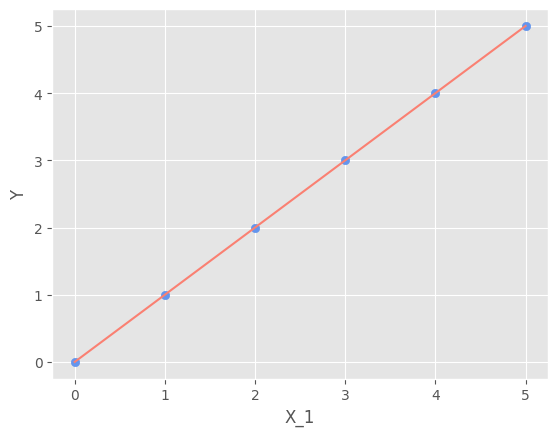

In [ ]:
plt.scatter(df["X_1"],df["Y"],color="cornflowerblue")
plt.plot(df["X_1"],h(0,1,df["X_1"]),color="salmon")
plt.xlabel("X_1")
plt.ylabel("Y")
plt.show()

4.

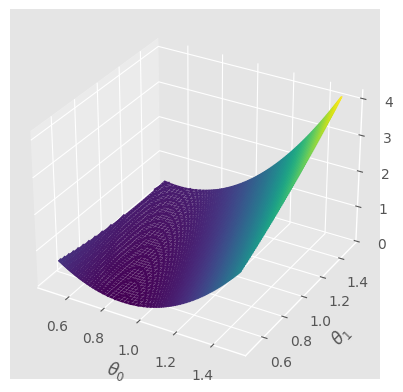

In [ ]:
t0,t1 = np.meshgrid(np.linspace(0.5,1.5,50),np.linspace(0.5,1.5,50))
Z = np.zeros((50,50))
for i in range(50):
  for j in range(50):
    Z[j,i] = Coste(t0[i,j],t1[i,j],df["X_1"],df["Y"])
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(t0,t1,Z,cmap="viridis")
ax.contour(t0,t1,Z,200,linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()


5.

**1D:**

$\theta_0 = 0$

$J(\theta_1) = \frac{1}{2m} \sum_{i=0}^m (\theta_1 X^{(i)} - y^{(i)})^2$

$= \frac{1}{10} ((\theta_1-1)^2+(\theta_12-2)^2+(\theta_13-3)^2+(\theta_14-4)^2+(\theta_15-5)^2)$

**2D:**

$J(\theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X^{(i)})- y^{(i)})^2$

$= \frac{1}{10} ((\theta_0+\theta_1-1)^2+(\theta_0+\theta_12-2)^2+(\theta_0+\theta_13-3)^2+(\theta_0+\theta_14-4)^2+(\theta_0+\theta_15-5)^2)$



6.

In [ ]:
def Gradiente(f,alpha):
 x = sp.Symbol("x")
 f = sp.sympify(f)
 f_diff = sp.diff(f,x)
 f = sp.lambdify(x,f,"numpy")
 f_diff = sp.lambdify(x,f_diff,"numpy")
 w = np.random.randint(100)
 eps = 1e-4
 for i in range(2000):
  w = w - alpha*f_diff(w)
  if np.abs(f_diff(w)) < eps:
    break
 return w

print("Para alpha = 0.1:")
print(Gradiente("(x-4)**2",0.1))
print("Para alpha = 0.01:")
print(Gradiente("(x-4)**2",0.01))
print("Para alpha = 0.001:")
print(Gradiente("(x-4)**2",0.001))

Para alpha = 0.1:
4.0000462936252985
Para alpha = 0.01:
4.0
Para alpha = 0.001:
4.328363654027509


7.

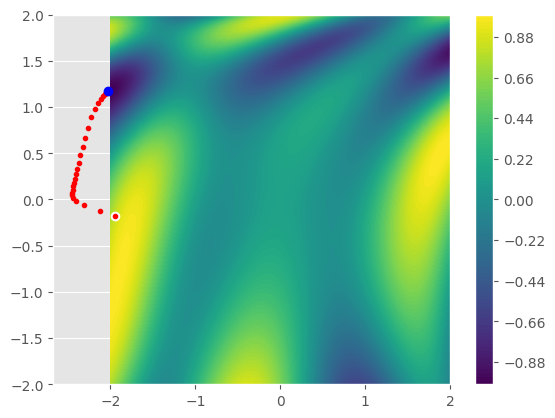

[-2.02885888  1.17073521]


In [ ]:
func = lambda th: np.sin(1/2*th[0]**2 - 1/4*th[1]**2 + 3)*np.cos(2*th[0] + 1 - np.exp(th[1]))
res = 100
_X = np.linspace(-2,2,res)
_Y = np.linspace(-2,2,res)

_Z = np.zeros((res,res))
for ix, x in enumerate(_X):
  for iy, y in enumerate(_Y):
    _Z[iy,ix] = func([x,y])

Theta = np.random.rand(2)*4-2
_T = np.copy(Theta)
h = 0.001
grad = np.zeros(2)
lr = 0.001

plt.plot(Theta[0],Theta[1],"o",color="white")

for _ in range(10000):
 for it, th in enumerate(Theta):
  _T = np.copy(Theta)
  _T[it] = _T[it] + h
  deriv = (func(_T) - func(Theta))/h
  grad[it] = deriv
 Theta = Theta - lr*grad
 if (_%100==0):
  plt.plot(Theta[0],Theta[1],".",color="red")

plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
plt.plot(Theta[0],Theta[1],"o",color="blue")
plt.show()

print(Theta)

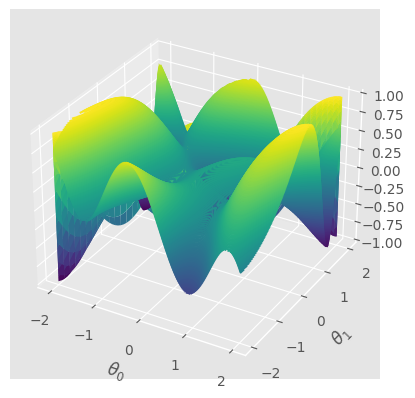

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(_X,_Y,_Z,cmap="viridis")
ax.contour(_X,_Y,_Z,200,linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

8.

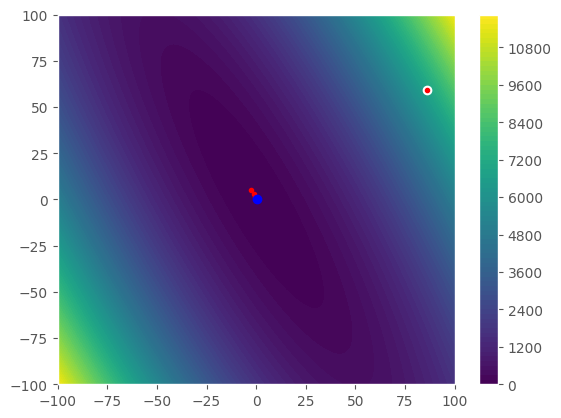

[0.20983316 0.19956705]


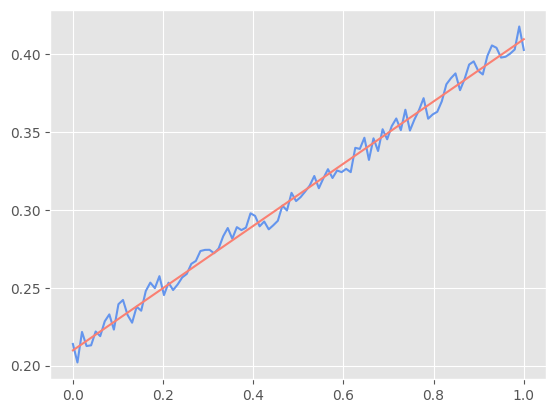

In [ ]:
X = np.linspace(0, 1, 100)
Y = 0.2 + 0.2*X + 0.02*np.random.random(100)

def h(theta_0,theta_1,X): #Modelo a emplear
    return theta_0 + theta_1*X

res = 100
_theta0 = np.linspace(-100,100,res)
_theta1 = np.linspace(-100,100,res)
_Z = np.zeros((res,res))
for ix, x in enumerate(_theta0):
  for iy, y in enumerate(_theta1):
    _Z[iy,ix] = Coste(x,y,X,Y)

W = np.random.randint(100,size=(2))
_W = np.copy(W)
_h = 0.001
grad = np.zeros(2)
lr = 0.1

plt.plot(W[0],W[1],"o",color="white")

for _ in range(10000):
 for it, th in enumerate(W):
  _W = np.copy(W)
  _W[it] = _W[it] + _h
  deriv = (Coste(_W[0],_W[1],X,Y) - Coste(W[0],W[1],X,Y))/_h
  grad[it] = deriv
 W = W - lr*grad
 if (_%100==0):
  plt.plot(W[0],W[1],".",color="red")

plt.contourf(_theta0,_theta1,_Z,100)
plt.colorbar()
plt.plot(W[0],W[1],"o",color="blue")
plt.show()

print(W)

plt.plot(X,Y,color="cornflowerblue")
plt.plot(X,h(W[0],W[1],X),color="salmon")
plt.show()

9.

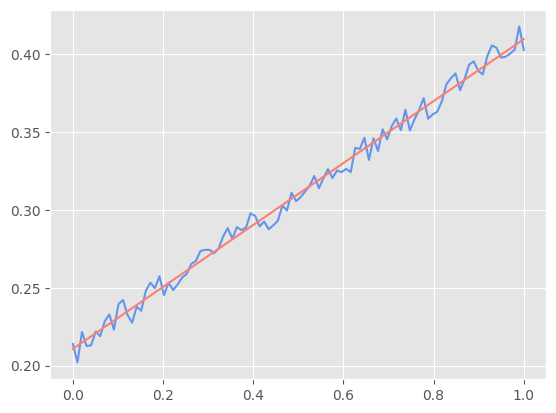

Diferencia entre intercepto: 0.0009851485148528738
Diferencia entre coeficiente: [0.0009703]


In [ ]:
model = LinearRegression()
model.fit(X.reshape(-1,1),Y)
plt.plot(X,Y,color="cornflowerblue")
plt.plot(X,h(model.intercept_,model.coef_,X),color="salmon")
plt.show()

print(f"Diferencia entre intercepto: {np.abs(model.intercept_ - W[0])}")
print(f"Diferencia entre coeficiente: {np.abs(model.coef_ - W[1])}")